<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Ayudantia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ayudantía 2 - ICH3424 - Ingeniería de Costas

## Cálculo iterativo de la celeridad de la onda a partir de la ecuación de dispersión (resolución relación de dispersión)

La celeridad (velocidad de fase) de la onda puede ser escrita de dos forma:

$$ C=\frac{\omega}{k}=\frac{2 \pi f}{k} $$

y:

$$ C=\frac{\omega}{k}=\sqrt{\frac{g}{k} \tanh(kh)}=\sqrt{\frac{g L}{2 \pi} \tanh \left(\frac{2 \pi h}{L}\right) } $$

donde $\omega$, $f$ y $h$ representan la frecuencia angular, frecuencia, profundidad del agua, respectivamente, y $k$, $L$ y $g$ son el número de onda, longitud de onda y la aceleración gravitacional, respectivamente.


Para resolver la ecuación de dispersión, podemos utilizar la metodología propuesta por Watada (2013). Para la velocidad de fase $C(f,h)$; Se necesita  para un par dado de frecuencia $f$ y profundidad $h$. Sin embargo, $C$ no se puede calcular directamente con las ecuaciones, porque $C$ tiene una variable desconocida (el número de onda $k$). Por lo tanto, para calcular el número de onda $k(f,h)$ para un par dado de frecuencia $f$ y profundidad $h$, primero resolvemos la forma combinada de las dos ecuaciones anteriores:

$$\frac{2 \pi f}{k}=\sqrt{\frac{g}{k} \tanh k h}$$

Una vez que tenemos $k(f,h)$, la velocidad de fase $C(f,h)$; se puede calcular con las Ecs. (1 o 2).

Debido a que la ecuación anterior no puede resolverse analíticamente, lo resolvimos iterativamente usando un algoritmo recursivo.

Comenzamos con cálculos iterativos:

$$k_{n}=\frac{2 \pi f}{C_{n-1}}, \quad n=1,2,3, \ldots $$

Donde:

$$ C_{n}=\sqrt{\frac{g}{k_{n}} \tanh k_{n} h} \quad n=1,2,3, \ldots $$

Con un valor inicial dado por:

$$ C_{0}=\sqrt{g h} $$

Los cálculos se repiten hasta que se cumple la condición adimensional para la convergencia:

$$ \frac{\left|k_{n}-k_{n-1}\right|}{k_{n}}<\Delta c \frac{k_{n}}{2 \pi f}=\frac{\Delta c}{C_{n-1}} $$

Donde $\Delta c$ puede ser establecido en $0.0001$ m/s, lo que logra la convergencia suficiente de los valores.


In [ ]:
#Importamos Librerias
import numpy as np
import matplotlib.pyplot as plt

def disper(T,h,delta_c=0.0001,tol=1e-6):
  #constante
  g = 9.81 #m/s2
  f = 1/T
  C = np.sqrt(g*h)
  for i in range(15):
    k = 2*np.pi*f/C
    C = np.sqrt((g/k)*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C


Para una onda de periodo $T=20$ s, Profundidad $h=50$ m, encontrar la longitud de la onda $L$ 

In [ ]:
#Inputs
T = 20 #(s)
h = 50 #(m)

#f = 1/T # (Hz)
C = disper(T,h) #(m/s)
L = C*T #(m)
print('La lonngitud de onda es',np.round(L,2),'metros')

La lonngitud de onda es 405.64 metros


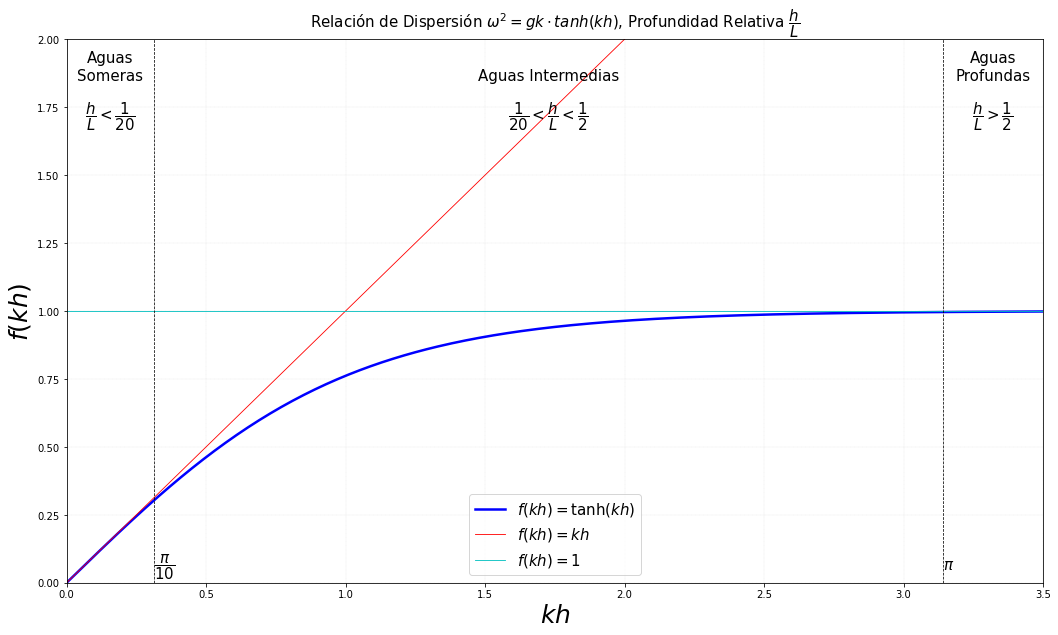

In [ ]:
dkh = 0.01
kh = np.arange(0,5+dkh,dkh)

alto  = 10
ancho = 17.5
fig = plt.figure(figsize=(ancho, alto))

plt.plot(kh,np.tanh(kh),'b',linewidth=2.5,label=r'$f(kh) = \tanh(kh)$')
plt.plot(kh,kh,'r',linewidth=0.85,label=r'$f(kh) = kh$')
plt.plot(kh,np.ones(len(kh)),'c',linewidth=0.85,label=r'$f(kh) = 1$')
plt.xlim(0,3.5)
plt.ylim(0,2)

plt.title('Relación de Dispersión $\omega^{2}=gk \cdot tanh(kh)$, Profundidad Relativa $\dfrac{h}{L}$',fontsize=15)
plt.xlabel(r'$kh$',fontsize=25)
plt.ylabel('$f(kh)$',fontsize=25)
plt.grid(color='lightgray', linestyle='--', linewidth=0.25)
plt.axvline(x=np.pi/10,linewidth=0.75, linestyle='--', color='k')
plt.text(np.pi/10,0.05,r'$\dfrac{\pi}{10}$',fontsize=15)
plt.axvline(x=np.pi,linewidth=0.75, linestyle='--', color='k')
plt.text(np.pi,0.05,r'$\pi$',fontsize=15)
plt.text(np.pi/10/2,1.85,'Aguas\nSomeras',fontsize=15,horizontalalignment='center')
plt.text(np.pi/10/2,1.7,'$\dfrac{h}{L} < \dfrac{1}{20}$',fontsize=15,horizontalalignment='center')
plt.text((np.pi/10+np.pi)/2,1.85,'Aguas Intermedias',fontsize=15,horizontalalignment='center')

plt.text((np.pi/10+np.pi)/2,1.7,'$\dfrac{1}{20} < \dfrac{h}{L} < \dfrac{1}{2}$',fontsize=15,horizontalalignment='center')

plt.text((np.pi+3.5)/2,1.85,'Aguas\nProfundas',fontsize=15,horizontalalignment='center')
plt.text((np.pi+3.5)/2,1.7,'$\dfrac{h}{L} > \dfrac{1}{2}$',fontsize=15,horizontalalignment='center')

plt.legend(fontsize=15)
plt.show()

## Animaciones

### Animación de ondas en 1D usando teoría lineal. 

Animar una onda: $H=2$ m, $T=10$ s, $h=50$ m

$\eta = \frac{H}{2}\cos(k\cdot x-\omega\cdot t)$

In [16]:
# Librerias utiles para animaciones
from IPython.display import HTML
from matplotlib import animation

#Inputs
H = 2.0 #(m)
T = 10.0 #(s)
h = 50.0 #(m)
#------------------------

C = disper(T,h)
L = C*T
k = 2*np.pi/L
w = 2*np.pi/T

#vector de espacio
dx = 1
x = np.arange(0,4*L+dx,dx)

t_total = 10 #(s)

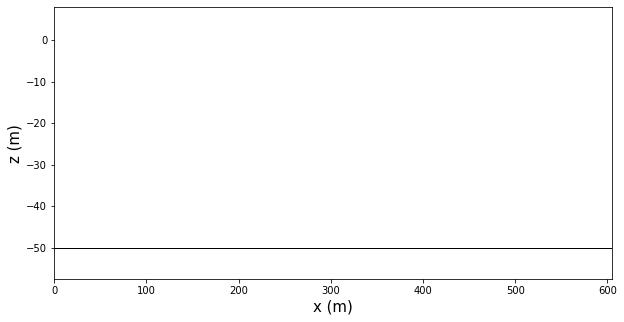

In [18]:
#Creamos el grafico
alto  = 5
ancho = 10

fig, ax = plt.subplots(figsize=(ancho,alto))

#Definir cosas que no se mueven 
ax.set_xlabel('x (m)',fontsize=15)
ax.set_ylabel('z (m)',fontsize=15)
ax.axhline(y=-h,linewidth=1.0,color='k')
ax.set_xlim(0,4*L)
ax.set_ylim(-1.15*h,4*H)

#cosas animadas
line, = ax.plot([],[], linewidth=1.0, color='k')
time_text = ax.text(2.5*L,-0.8*h,'',fontsize=15)


In [20]:
def animate(t):
  eta = (H/2)*np.cos(k*x - w*t)
  ##Standing Wave
  #eta1 = (H/2)*np.cos(k*x + w*t)
  #eta2 = (H/2)*np.cos(k*x - w*t)
  #eta = eta1 + eta2
  time_text.set_text('Tiempo = %0.1f ' % (t,))
  line.set_data(x,eta)
  ax.collections.clear()
  ax.fill_between(x,-h,eta,color='dodgerblue')
  ax.fill_between(x,-1.15*h,-h,color='sienna')
  return line, time_text

anim = animation.FuncAnimation(fig, animate, frames= t_total, interval=200, blit=True)

HTML(anim.to_jshtml())

## Animaciones

### Animación de ondas en 2D usando teoría lineal. 

Animar una onda en el plano x-y: $H=2$ m, $T=10$ s, $h=50$ m

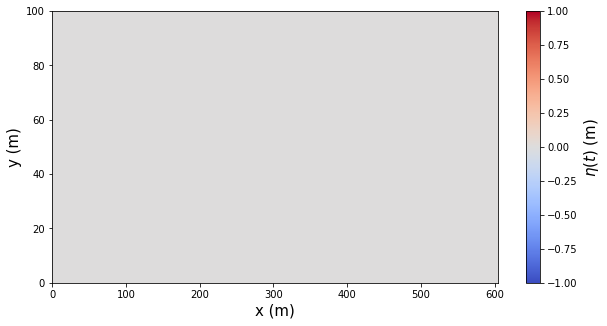

In [22]:
dx = 1
dy = 1

x = np.arange(0,4*L+dx,dx)
y = np.arange(0,100+dy,dy)

#Creamos el grafico
alto  = 5
ancho = 10

fig1, ax = plt.subplots(figsize=(ancho,alto))

#Definir cosas que no se mueven 
ax.set_xlabel('x (m)',fontsize=15)
ax.set_ylabel('y (m)',fontsize=15)
ax.set_xlim(0,4*L)
ax.set_ylim(0,100)

X, Y = np.meshgrid(x,y)

quad = ax.pcolormesh(X,Y,np.zeros(np.shape(X)),shading='gouraud',cmap=plt.cm.coolwarm, vmin=-H/2, vmax = H/2)

cbar = fig1.colorbar(quad)
cbar.ax.set_ylabel('$\eta (t)$ (m)',fontsize=15)

time_text = ax.set_title('',fontsize=15)
k = 2*np.pi/L
w = 2*np.pi/T

In [23]:
k = 2*np.pi/L
w = 2*np.pi/T

def animate_0(t):
  #eta1 = (H/2)*np.cos(k*X + w*t)
  #eta2 = (H/2)*np.cos(k*X - w*t)
  #eta = eta1 + eta2
  eta = (H/2)*np.cos(k*X - w*t)
  time_text.set_text('Tiempo = %0.1f ' % (t,))
  quad.set_array(eta.ravel())
  return quad, time_text

anim = animation.FuncAnimation(fig1, animate_0, frames= t_total, interval=200, blit=True)

HTML(anim.to_jshtml())